# IMPLEMENTING AND, OR, NAND, NOT, XNOR FUNCTIONS

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
training_data_NOT = [(np.array([0,1]), 1),
                     (np.array([1,1]), 0)]

training_data_OR = [(np.array([0,0,1]), 0),
                    (np.array([0,1,1]), 1),
                    (np.array([1,0,1]), 1),
                    (np.array([1,1,1]), 1)]

training_data_AND = [(np.array([0,0,1]), 0),
                     (np.array([0,1,1]), 0),
                     (np.array([1,0,1]), 0),
                     (np.array([1,1,1]), 1)]

training_data_NAND = [(np.array([0,0,1]), 1),
                      (np.array([0,1,1]), 1),
                      (np.array([1,0,1]), 1),
                      (np.array([1,1,1]), 0)]

training_data_XNOR = [(np.array([0,0,1]), 1),
                     (np.array([0,1,1]), 0),
                     (np.array([1,0,1]), 0),
                     (np.array([1,1,1]), 1)]

In [14]:
def step_activation(x):
    return 0 if x < 0 else 1

In [15]:
learning_rate = 0.2
epochs = 500

def learn(training_data, weights, epochs):
    for i in range(epochs):
        x, label = random.choice(training_data)
        dot_product = np.dot(weights, x)
        error = label - step_activation(dot_product)
        weights += learning_rate * error * x

In [16]:
def plot(testing_data, weights, title, is_NOT = False):
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.title(title)
    plt.xlim([-1,2])
    plt.ylim([-0.5,1.5])
    if is_NOT:
        x = (-1 * weights[1] / weights[0])
        y = 0
        plt.scatter([x[0][0] for x in testing_data], [0] * len(testing_data), marker='o', c='b')
        plt.plot(x, y, 'ro')
    else:
        x = np.arange(-2,3,0.1)
        y = ((-1 * weights[1] / weights[0]) * x) + (-1 * weights[2] / weights[0])
        plt.scatter([x[0][0] for x in testing_data], [x[0][1] for x in testing_data], marker='o', c='b')
        plt.plot(x, y)
    plt.show()

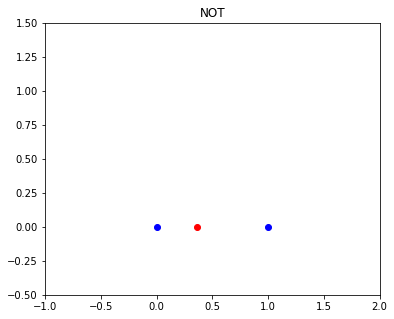

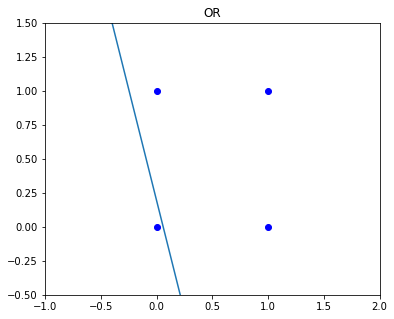

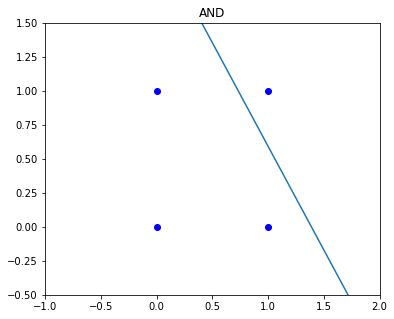

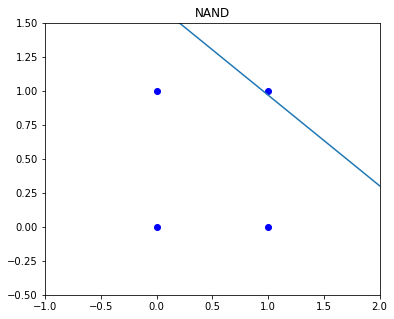

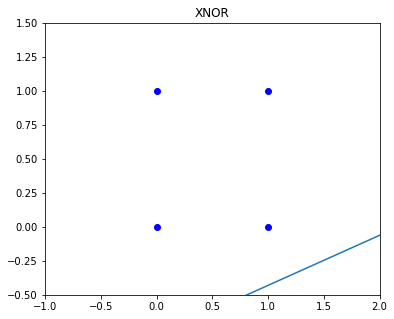

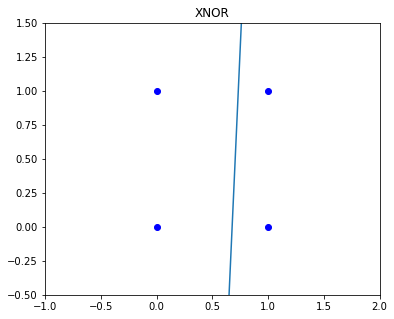

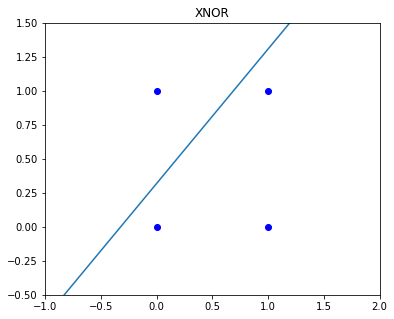

In [17]:
weights = np.random.rand(2)
learn(training_data_NOT, weights, epochs)
plot(training_data_NOT, weights, "NOT", is_NOT=True)

weights = np.random.rand(3)
learn(training_data_OR, weights, epochs)
plot(training_data_OR, weights, "OR")

weights = np.random.rand(3)
learn(training_data_AND, weights, epochs)
plot(training_data_AND, weights, "AND")

weights = np.random.rand(3)
learn(training_data_NAND, weights, epochs)
plot(training_data_NAND, weights, "NAND")

# 3 tries for XNOR.
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")
weights = np.random.rand(3)
learn(training_data_XNOR, weights, epochs)
plot(training_data_XNOR, weights, "XNOR")

Since xnor cannot be seperated using a single line, hence we need multiple models for xnor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as neha


# MULTI LAYER PERCEPTRON ==> XOR

In [2]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


# PERCEPTRON_IRIS-DATASET


In [5]:
import numpy as np
import pandas as pd

data=pd.read_csv('iris.csv')
del data['Unnamed: 0']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['sepal_length']=le.fit_transform(data['sepal_length'])

In [8]:
X=data[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
y=data['species']

from sklearn.model_selection import train_test_split

# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.05)

clf.fit(X_train,y_train)

Iteration 1, loss = 2.24364056
Iteration 2, loss = 2.08906590
Iteration 3, loss = 1.77268070
Iteration 4, loss = 0.90857590
Iteration 5, loss = 1.42614633
Iteration 6, loss = 1.30052367
Iteration 7, loss = 0.86524657
Iteration 8, loss = 0.89027032
Iteration 9, loss = 1.03745405
Iteration 10, loss = 0.96224343
Iteration 11, loss = 0.87096554
Iteration 12, loss = 0.82233821
Iteration 13, loss = 0.78494226
Iteration 14, loss = 0.72297923
Iteration 15, loss = 0.70764589
Iteration 16, loss = 0.72804504
Iteration 17, loss = 0.73957897
Iteration 18, loss = 0.71687864
Iteration 19, loss = 0.67750754
Iteration 20, loss = 0.63681208
Iteration 21, loss = 0.59516844
Iteration 22, loss = 0.55387734
Iteration 23, loss = 0.52386803
Iteration 24, loss = 0.51272895
Iteration 25, loss = 0.51030890
Iteration 26, loss = 0.49981922
Iteration 27, loss = 0.47866049
Iteration 28, loss = 0.45899711
Iteration 29, loss = 0.44223213
Iteration 30, loss = 0.42703869
Iteration 31, loss = 0.41113491
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.05,
              random_state=5, verbose=True)

In [10]:
ypred=clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,ypred)

0.9666666666666667